<a href="https://colab.research.google.com/github/deeponcology/PyTorchMedicalAI/blob/master/shlomo_dl_0006_pretrained_cnn_collab_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning in Medical AI 2018/2019 using PyTorch & Google Collab.


<table align="left"><td>
<a target="_blank" href="https://colab.research.google.com/drive/1JEIeD_445sFvcjSrITB5Z_oW8VHRS_kA">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank" href="https://github.com/deeponcology/PyTorchMedicalAI/blob/master/shlomo_dl_0001_cuda_collab_pytorch.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/tumor_visdom.jpg" align="center" width=30%>

### Author: 
***Shlomo Kashani***, Head of AI at www.DeepOncology.AI, shlomo@deeponcology.ai 

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/line-up-small.png" align="center" width=30%>


### Synopsys:
This is the hands-on deep learning tutorial series for the 2018/2019 Medical AI course. The series will guide you through the most basic building blocks such as installing CUDA to training advanced CNN's such as SeNet. 

### DataSets:
We foster the use of Medical Data Sets (https://grand-challenge.org/All_Challenges/) and predominantly those available (but not only) via Kaggle.

### About PyTorch:

PyTorch is an open source library for numerical computation using  computation graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. 


Similar to python programming, we can add and execute a node to the computation graph immediately. This property makes it easy to debug the code and inspect the values in the network.

### The other Notebooks in this series: 
If you are familiar with these topics, feel free to jump to other modules.



# Collab notebook: 003 using a pre-trained CNN for inference only

- https://github.com/hpanwar08/dog-breed-transfer-learning-pytorch


# Transfer Learning

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest. The three major Transfer Learning scenarios look as follows:


(adapted from cs321)
## ConvNet as fixed feature extractor. 
Take a ConvNet pretrained on ImageNet, remove the last fully-connected layer (this layer’s outputs are the 1000 class scores for a different task like ImageNet), then treat the rest of the ConvNet as a fixed feature extractor for the new dataset. In an AlexNet, this would compute a 4096-D vector for every image that contains the activations of the hidden layer immediately before the classifier. We call these features CNN codes. It is important for performance that these codes are ReLUd (i.e. thresholded at zero) if they were also thresholded during the training of the ConvNet on ImageNet (as is usually the case). Once you extract the 4096-D codes for all images, train a linear classifier (e.g. Linear SVM or Softmax classifier) for the new dataset.

## Fine-tuning the ConvNet. 
The second strategy is to not only replace and retrain the classifier on top of the ConvNet on the new dataset, but to also fine-tune the weights of the pretrained network by continuing the backpropagation. It is possible to fine-tune all the layers of the ConvNet, or it’s possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. This is motivated by the observation that the earlier features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the ConvNet becomes progressively more specific to the details of the classes contained in the original dataset. In case of ImageNet for example, which contains many dog breeds, a significant portion of the representational power of the ConvNet may be devoted to features that are specific to differentiating between dog breeds.

## Pretrained models. 
Since modern ConvNets take 2-3 weeks to train across multiple GPUs on ImageNet, it is common to see people release their final ConvNet checkpoints for the benefit of others who can use the networks for fine-tuning. For example, the Caffe library has a Model Zoo where people share their network weights.

## When and how to fine-tune? 
How do you decide what type of transfer learning you should perform on a new dataset? This is a function of several factors, but the two most important ones are the size of the new dataset (small or big), and its similarity to the original dataset (e.g. ImageNet-like in terms of the content of images and the classes, or very different, such as microscope images). Keeping in mind that ConvNet features are more generic in early layers and more original-dataset-specific in later layers, here are some common rules of thumb for navigating the 4 major scenarios:

1. New dataset is small and similar to original dataset. Since the data is small, it is not a good idea to fine-tune the ConvNet due to overfitting concerns. Since the data is similar to the original data, we expect higher-level features in the ConvNet to be relevant to this dataset as well. Hence, the best idea might be to train a linear classifier on the CNN codes.
2. New dataset is large and similar to the original dataset. Since we have more data, we can have more confidence that we won’t overfit if we were to try to fine-tune through the full network.
3. New dataset is small but very different from the original dataset. Since the data is small, it is likely best to only train a linear classifier. Since the dataset is very different, it might not be best to train the classifier form the top of the network, which contains more dataset-specific features. Instead, it might work better to train the SVM classifier from activations somewhere earlier in the network.
4. New dataset is large and very different from the original dataset. Since the dataset is very large, we may expect that we can afford to train a ConvNet from scratch. However, in practice it is very often still beneficial to initialize with weights from a pretrained model. In this case, we would have enough data and confidence to fine-tune through the entire network.

## Practical advice. 
There are a few additional things to keep in mind when performing Transfer Learning:

- Constraints from pretrained models. Note that if you wish to use a pretrained network, you may be slightly constrained in terms of the architecture you can use for your new dataset. For example, you can’t arbitrarily take out Conv layers from the pretrained network. However, some changes are straight-forward: Due to parameter sharing, you can easily run a pretrained network on images of different spatial size. This is clearly evident in the case of Conv/Pool layers because their forward function is independent of the input volume spatial size (as long as the strides “fit”). In case of FC layers, this still holds true because FC layers can be converted to a Convolutional Layer: For example, in an AlexNet, the final pooling volume before the first FC layer is of size [6x6x512]. Therefore, the FC layer looking at this volume is equivalent to having a Convolutional Layer that has receptive field size 6x6, and is applied with padding of 0.

- Learning rates. It’s common to use a smaller learning rate for ConvNet weights that are being fine-tuned, in comparison to the (randomly-initialized) weights for the new linear classifier that computes the class scores of your new dataset. This is because we expect that the ConvNet weights are relatively good, so we don’t wish to distort them too quickly and too much (especially while the new Linear Classifier above them is being trained from random initialization).

# More About transfre learning:
For classifying images, a particular type of deep neural network, called a convolutional neural network has proved to be particularly powerful. However, modern convolutional neural networks have millions of parameters. Training them from scratch requires a lot of labeled training data and a lot of computing power (hundreds of GPU-hours or more). We only have about three thousand labeled photos and want to spend much less time, so we need to be more clever.

We will use a technique called **transfer learning** where we take a pre-trained network (trained on about a million general images), use it to extract features, and train a new layer on top for our own task of classifying images of flowers.

### Task 01:

Take a moment to look at the various models you can import in PyTorch: https://github.com/Cadene/pretrained-models.pytorch and look at the documentation for individual models. 

Spend some time looking at the documentation for the VGG16 model. Pay attention to "include_top" and "weights".

- What is the difference between including or not including the top?

- What is the difference between using the imagenet weights and not using them?

- What is imagenet?



In [0]:
%reset -f
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
import sys
sys.version

# !pip3 install torch==0.4
# !pip3 install torchvision

!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(0)


    100% |████████████████████████████████| 2.0MB 11.6MB/s 


In [0]:
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random 


# PyTorch image pre-processing 

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be atleast 224.

The images have to be loaded in to a range of [0, 1] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]

An example of such normalization can be found in the imagenet example here: https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L89-L10119


In [0]:
!wget https://avatars3.githubusercontent.com/u/184545?s=400&v=4 
! mv "184545?s=400.1" xxx.png  

--2018-12-05 12:20:02--  https://avatars3.githubusercontent.com/u/184545?s=400
Resolving avatars3.githubusercontent.com (avatars3.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to avatars3.githubusercontent.com (avatars3.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21796 (21K) [image/jpeg]
Saving to: ‘184545?s=400.1’

184545?s=400.1      100%[===================>]  21.29K  --.-KB/s    in 0.01s   

2018-12-05 12:20:02 (1.57 MB/s) - ‘184545?s=400.1’ saved [21796/21796]



In [0]:
import io
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable

LABELS_URL = 'http://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

# This can be any image you like
IMG_URL = 'xxx.png'

# Initialize the pre-trained model
squeeze = models.squeezenet1_1(pretrained=True)

# Image pre-processing transforms
normalize = transforms.Normalize( # Imagenet, we've done a pass on the dataset and calculated per-channel mean/std.
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

/usr/local/lib/python3.6/dist-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/usr/local/lib/python3.6/dist-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [0]:
# Create a pillow image
im = Image.open(IMG_URL)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


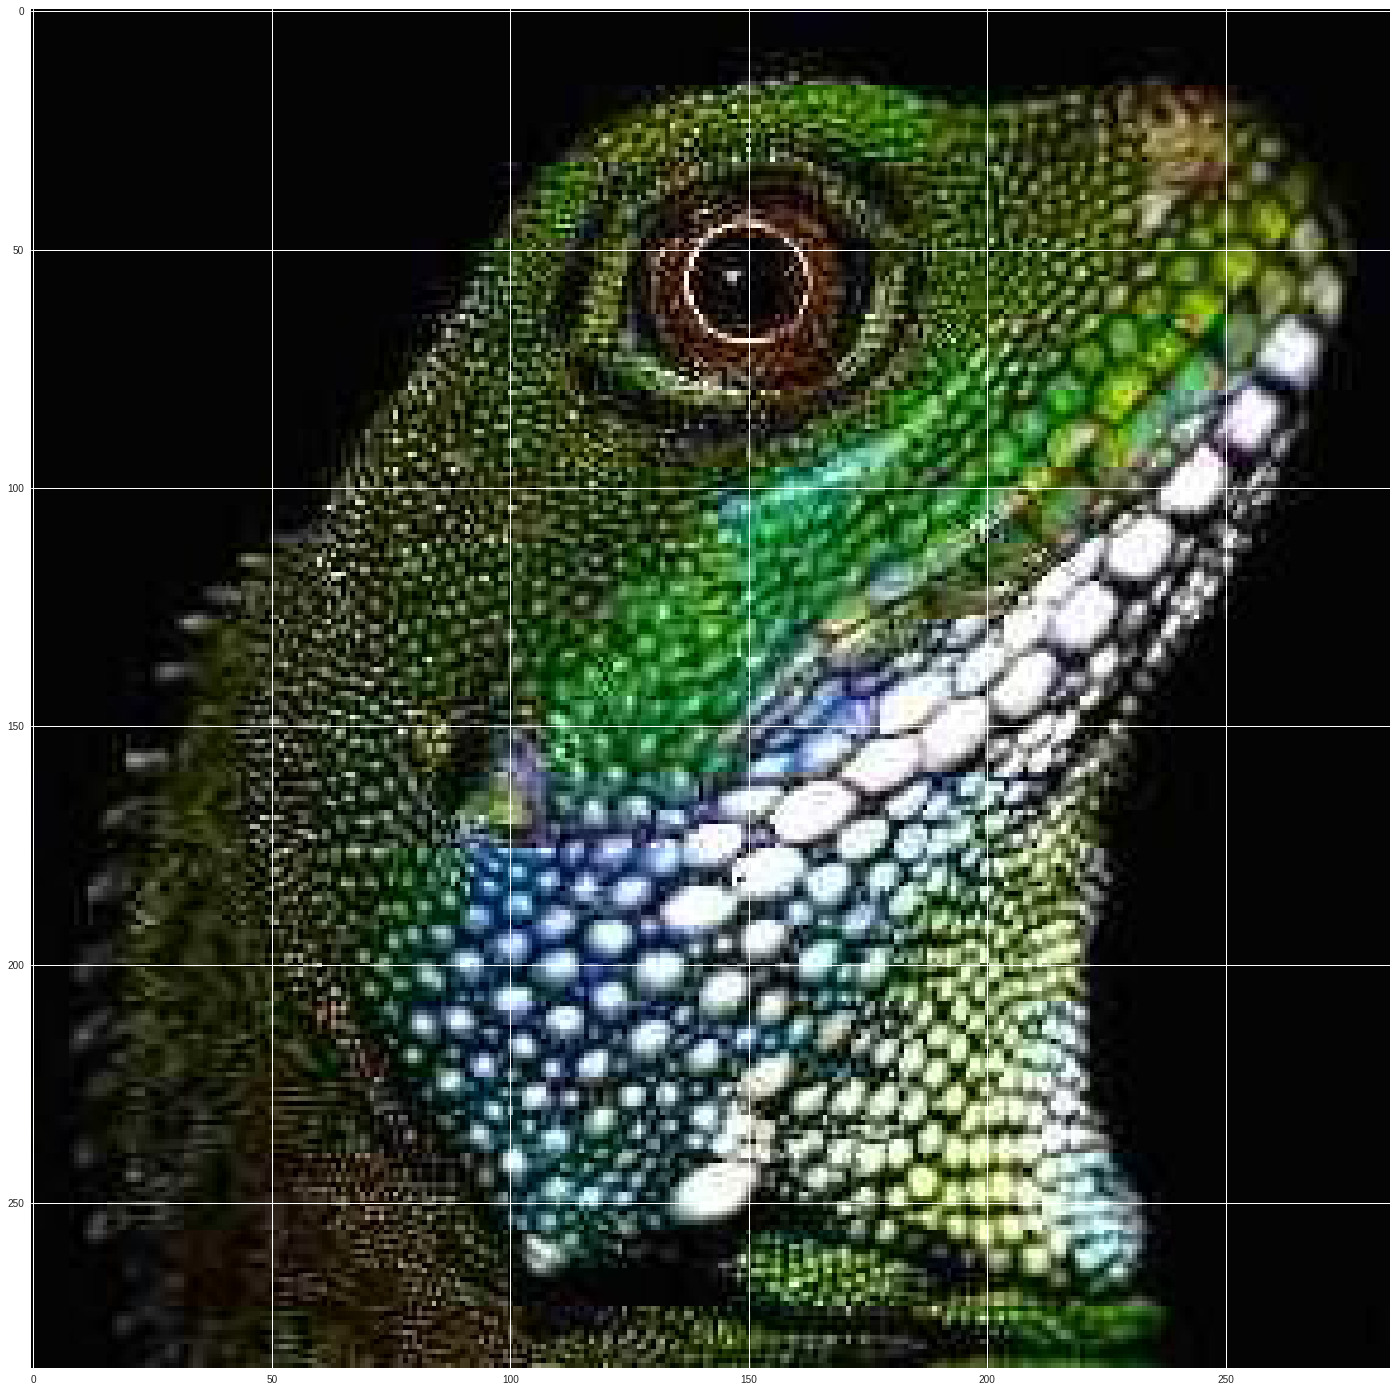

In [0]:
from glob import glob
import matplotlib.pyplot as plot   # Library to plot
import matplotlib.cm as colormap   # Library to plot
import numpy as np
from PIL import Image

print (str (type(im)))
figure = plot.figure()
figure.set_size_inches(25, 25)
imshow(im)

# Apply transforms 

In [0]:
img_tensor = preprocess(im)
# Add a batch dimension
img_tensor.unsqueeze_(0)
# Forward pass without activation
fc_out = squeeze(Variable(img_tensor))

# Download ImageNet labels and store them as a dict
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

In [0]:
# Print the label
print(labels[fc_out.data.numpy().argmax()])

green lizard, Lacerta viridis
